In [1]:
import pandas as pd
import requests
import zipfile
import io
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../Data/ny_od_main_JT00_2019.csv.gz')
df

,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate
0,360010001001004,360010002004006,1,1,0,0,0,0,1,0,0,1,20211018
1,360010001001004,360930320001020,1,0,1,0,0,0,1,0,0,1,20211018
2,360010001001005,360010002003009,1,1,0,0,0,0,1,1,0,0,20211018
3,360010001001005,360010007003002,1,0,1,0,0,0,1,1,0,0,20211018
4,360010001001005,360010021002003,1,0,0,1,0,0,1,0,1,0,20211018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7836552,361231505004020,361231505003007,1,0,1,0,0,1,0,0,1,0,20211018
7836553,361231505004020,361231505003010,1,0,1,0,0,0,1,0,1,0,20211018
7836554,361231505004020,361231505003016,1,0,0,1,0,1,0,0,1,0,20211018
7836555,361231505004023,360550113012014,1,0,0,1,0,0,1,0,0,1,20211018


In [3]:
df['h_geocode_ct']=df.h_geocode.astype(str).str[:-4].astype(int) #aggregate from CBG to Census tract
df['w_geocode_ct']=df.w_geocode.astype(str).str[:-4].astype(int)
OD_df=df[['h_geocode_ct','w_geocode_ct','S000']].groupby(['h_geocode_ct','w_geocode_ct']).sum().unstack()
OD_df.columns=OD_df.columns.droplevel(0)
OD_df=OD_df.fillna(0)
OD_df

w_geocode_ct,36001000100,36001000200,36001000300,36001000401,36001000403,36001000404,36001000501,36001000502,36001000600,36001000700,...,36121970700,36121970800,36121970900,36121971000,36121971100,36123150100,36123150200,36123150300,36123150400,36123150500
h_geocode_ct,,,,,,,,,,,,,,,,,,,,,
36001000100,17.0,26.0,31.0,21.0,13.0,0.0,3.0,7.0,7.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36001000200,19.0,77.0,77.0,58.0,26.0,0.0,18.0,8.0,8.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36001000300,9.0,26.0,117.0,70.0,55.0,7.0,12.0,19.0,13.0,54.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
36001000401,2.0,16.0,24.0,41.0,45.0,7.0,3.0,5.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36001000403,8.0,23.0,57.0,64.0,114.0,8.0,20.0,14.0,17.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36123150100,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,7.0,0.0,423.0,190.0,8.0,47.0,153.0
36123150200,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,128.0,505.0,42.0,197.0,209.0
36123150300,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,8.0,0.0,25.0,144.0,157.0,54.0,58.0


In [4]:
# OD_df.to_csv('../Data/OD_alljobs.csv') #dataframe of O-D commutes

In [5]:
CBD_df=df[['w_geocode_ct','S000']].groupby(['w_geocode_ct']).sum()
CBD_df.head() #of people who commute to each census tract

,S000
w_geocode_ct,
36001000100,1452
36001000200,3064
36001000300,11220
36001000401,9036
36001000403,10752


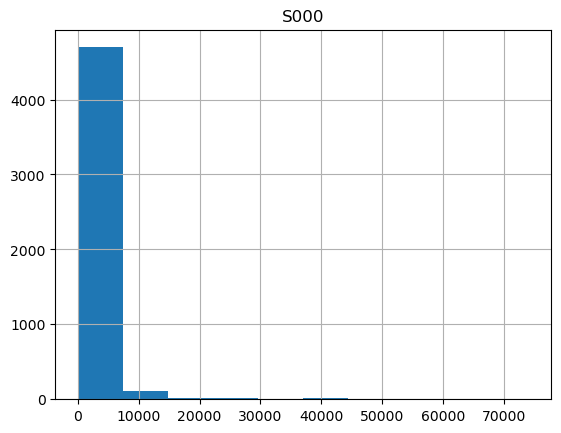

In [6]:
CBD_df.hist(); #histogram of total # of jobs

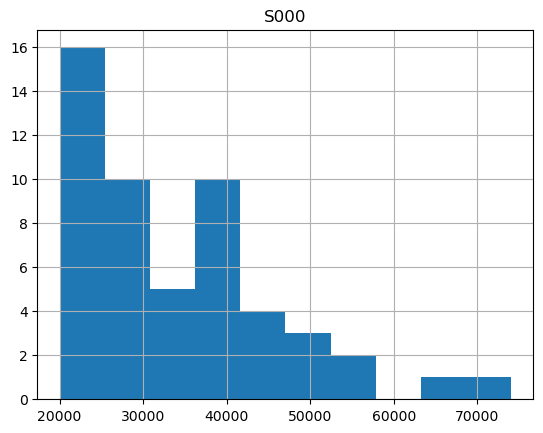

In [7]:
CBD_df[CBD_df['S000']>20000].hist(); # hist zoomed in to CTs with over 20,000 jobs

In [8]:
# url = 'http://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_36_tract_500k.zip'
# local_path = 'geo_files/'
# print('Downloading shapefile...')
# r = requests.get(url)
# z = zipfile.ZipFile(io.BytesIO(r.content))
# print("Done")
# z.extractall(path=local_path) # extract to folder
# filenames = [y for y in sorted(z.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 

# dbf, prj, shp, shx = [filename for filename in filenames]

county = gpd.read_file('../Data/geo_files/cb_2020_36_tract_500k.shp')
print("Shape of the dataframe: {}".format(county.shape))
print("Projection of dataframe: {}".format(county.crs))

nyc_CT=county[county.NAMELSADCO.isin(['Bronx County','Kings County', 'Queens County','New York County'])]
nyc_CT.set_crs(4269,allow_override=True)
nyc_CT['centroid']=nyc_CT.geometry.to_crs(4629).centroid
nyc_CT.head(n=2)
nyc_CT.GEOID=nyc_CT.GEOID.astype(int)

Shape of the dataframe: (5394, 14)
Projection of dataframe: epsg:4269


/var/folders/9f/7xdrpjw15kn4wccwzb5xhr0m0000gn/T/ipykernel_47827/1249205793.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nyc_CT['centroid']=nyc_CT.geometry.to_crs(4629).centroid
/Users/lizjohnson/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/lizjohnson/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [9]:
nyc_cbd=CBD_df.merge(nyc_CT,how='right',left_on='w_geocode_ct',right_on='GEOID') #merge LEHD data with geodata
nyc_cbd['S000_area_norm']=nyc_cbd['S000']/nyc_cbd['ALAND'] #create jobs/area variable to normalize
nyc_cbd=nyc_cbd.sort_values(by='S000_area_norm',ascending=False)
nyc_cbd = gpd.GeoDataFrame(nyc_cbd, geometry='geometry')
print('Total Jobs: ',nyc_cbd['S000'].sum())

Total Jobs:  3520137.0


In [10]:
nyc_cbd.head()

,S000,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry,centroid,S000_area_norm
1899,74028.0,36,061,010900,1400000US36061010900,36061010900,109,Census Tract 109,NY,New York County,New York,CT,175741,0,"POLYGON ((-73.99298 40.75285, -73.99253 40.753...",POINT (-73.98970 40.75225),0.421234
1012,67041.0,36,047,001100,1400000US36047001100,36047001100,11,Census Tract 11,NY,Kings County,New York,CT,168507,0,"POLYGON ((-73.99045 40.69373, -73.99066 40.694...",POINT (-73.98771 40.69329),0.397853
117,52535.0,36,061,011900,1400000US36061011900,36061011900,119,Census Tract 119,NY,New York County,New York,CT,177591,0,"POLYGON ((-73.98930 40.75791, -73.98884 40.758...",POINT (-73.98602 40.75732),0.295820
1785,51265.0,36,061,010100,1400000US36061010100,36061010100,101,Census Tract 101,NY,New York County,New York,CT,175520,0,"POLYGON ((-73.99484 40.75029, -73.99395 40.751...",POINT (-73.99154 40.74973),0.292075
572,41809.0,36,061,009400,1400000US36061009400,36061009400,94,Census Tract 94,NY,New York County,New York,CT,152754,0,"POLYGON ((-73.98040 40.75415, -73.97994 40.754...",POINT (-73.97775 40.75523),0.273702


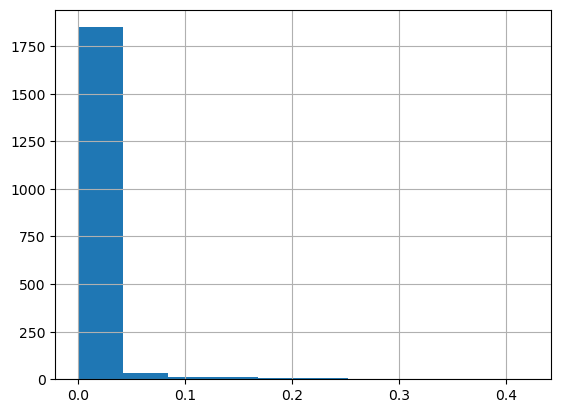

In [11]:
nyc_cbd['S000_area_norm'].hist();

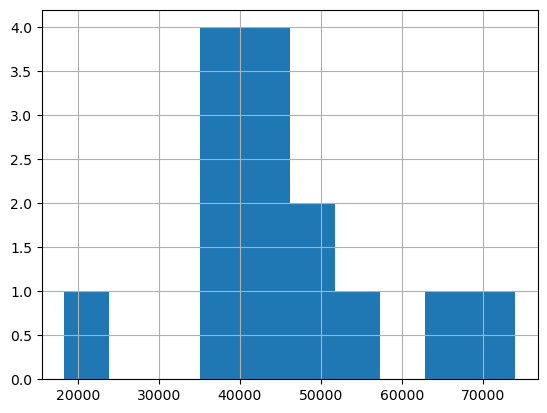

In [12]:
nyc_cbd[nyc_cbd['S000_area_norm']>0.2]['S000'].hist();

In [13]:
#five CBDs
jobs_in_cbd=nyc_cbd.head(n=5)['S000'].sum()
print('Percent of Jobs in 5 CBDS',jobs_in_cbd/nyc_cbd['S000'].sum()*100,'%')

Percent of Jobs in 5 CBDS 8.143944397618617 %


In [14]:
#10 CBDs
jobs_in_cbd=nyc_cbd.head(n=10)['S000'].sum()
print('Percent of Jobs in 10 CBDS',jobs_in_cbd/nyc_cbd['S000'].sum()*100,'%')

Percent of Jobs in 10 CBDS 13.636202227356492 %


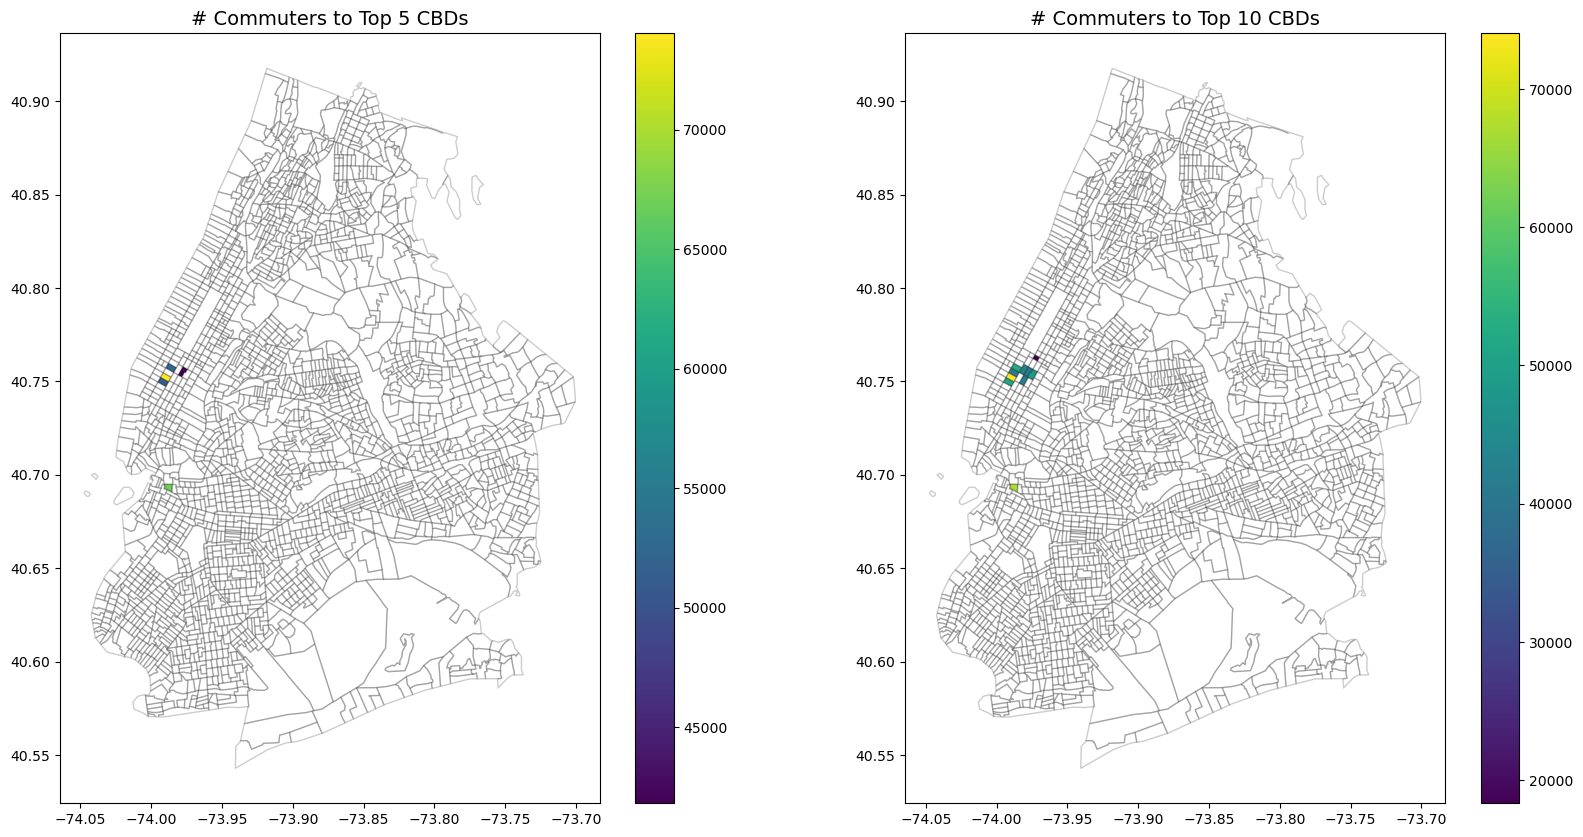

In [15]:
fig,(ax1,ax2)=plt.subplots(ncols=(2),nrows=(1),figsize=(20,10)) #standardize scale!!
nyc_cbd.head(n=5).plot(ax=ax1, column='S000', legend=True)
nyc_CT.plot(ax=ax1,color='none',alpha=0.2)

nyc_cbd.head(n=10).plot(ax=ax2, column='S000', legend=True)
nyc_CT.plot(ax=ax2,color='none',alpha=0.2)
ax1.set_title('# Commuters to Top 5 CBDs',fontsize=14);
ax2.set_title('# Commuters to Top 10 CBDs',fontsize=14);

In [16]:
#CBDS with over 15,000 jobs
print('Percent of Jobs in CBDS with over 15,000 jobs',nyc_cbd[nyc_cbd['S000']>15000]['S000'].sum()/nyc_cbd['S000'].sum()*100,'%')

Percent of Jobs in CBDS with over 15,000 jobs 40.502202044977224 %


In [17]:
#CBDS with over 15,000 jobs
print('Percent of Jobs in CBDS with density > 0.2 jobs/m^2 ',nyc_cbd[nyc_cbd['S000_area_norm']>0.2]['S000'].sum()/nyc_cbd['S000'].sum()*100,'%')

Percent of Jobs in CBDS with density > 0.2 jobs/m^2  18.029980083161536 %


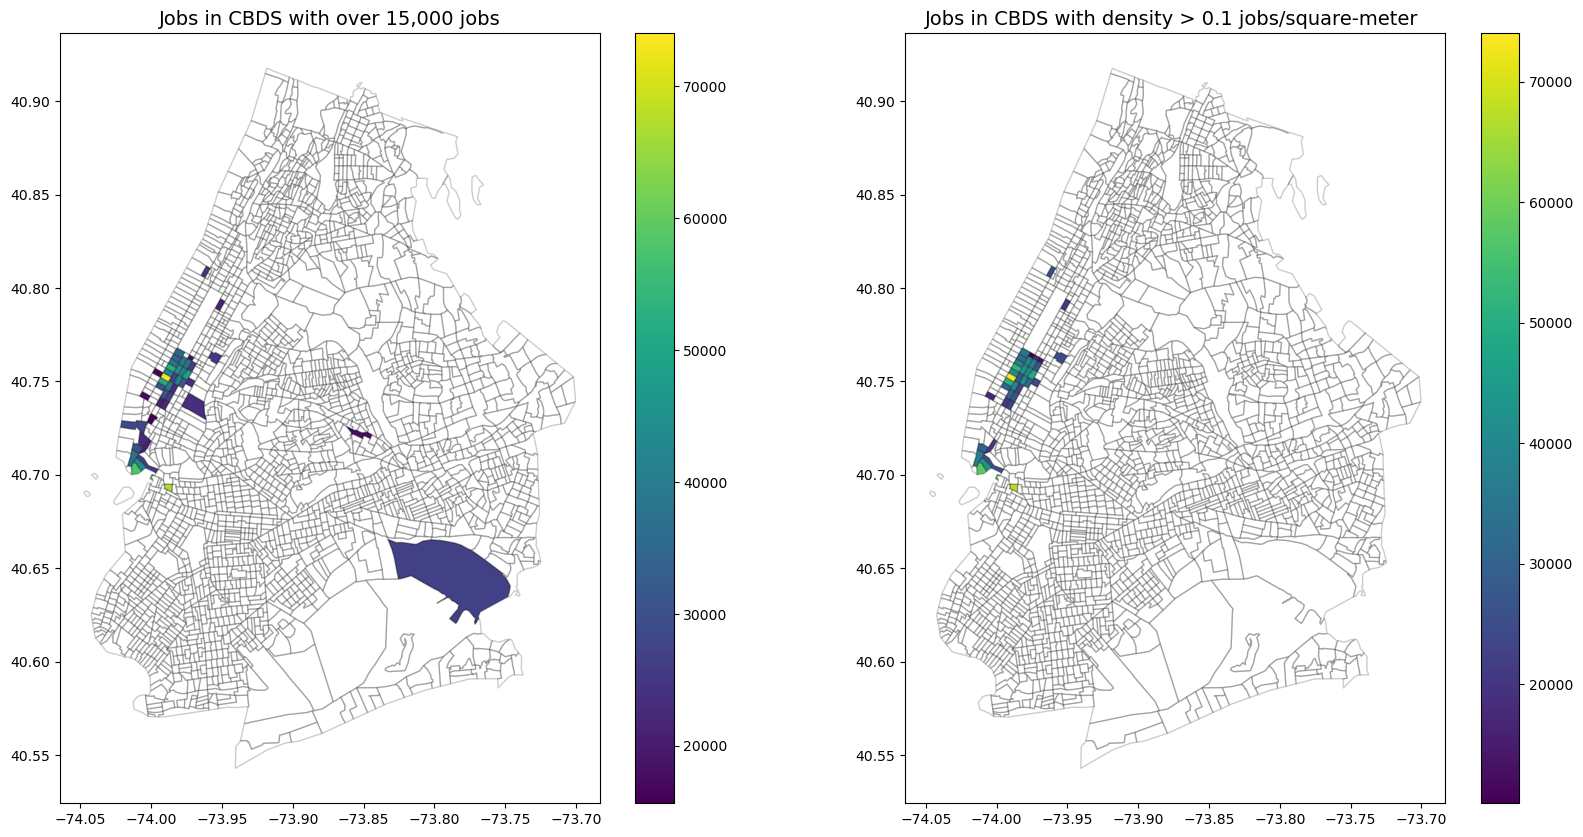

In [18]:


fig,(ax1,ax2)=plt.subplots(ncols=(2),nrows=(1),figsize=(20,10)) #standardize scale!!
nyc_cbd[nyc_cbd['S000']>15000].plot(ax=ax1, column='S000', legend=True)
nyc_CT.plot(ax=ax1,color='none',alpha=0.2)

nyc_cbd[nyc_cbd['S000_area_norm']>0.1].plot(ax=ax2, column='S000', legend=True)
nyc_CT.plot(ax=ax2,color='none',alpha=0.2)
ax1.set_title('Jobs in CBDS with over 15,000 jobs',fontsize=14);
ax2.set_title('Jobs in CBDS with density > 0.1 jobs/square-meter ',fontsize=14);

In [19]:
#nyc_cbd[['GEOID','S000','geometry', 'centroid']].head(n=10).to_csv('Top_10_CBDs.csv')

<AxesSubplot:>

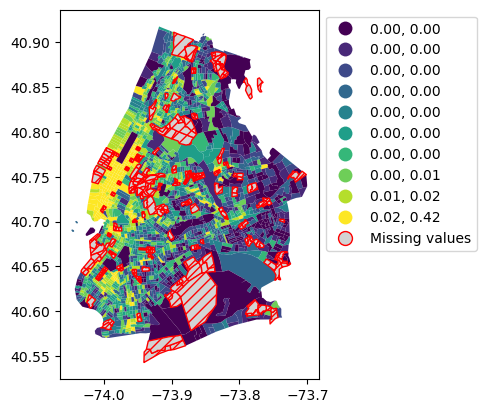

In [21]:
nyc_cbd.plot(column = 'S000_area_norm',k=10, scheme='Quantiles', legend=True, 
                     missing_kwds={"color": "lightgrey", ## what to do with missing values
                                         "edgecolor": "red",
                                        "hatch": "///",
                                        "label": "Missing values",}
                     ,legend_kwds={'bbox_to_anchor': (1, 1),'loc': 'upper left'})

<AxesSubplot:>

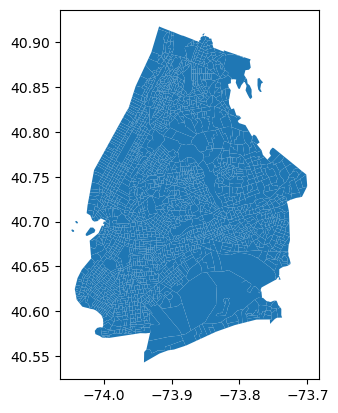

In [22]:
nyc_CT.plot()

<AxesSubplot:>

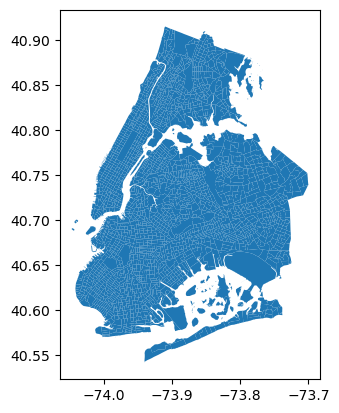

In [56]:
from shapely.wkt import loads

nyc_tracts = pd.read_csv('../Data/2020_Census_Tracts_-_Tabular.csv')
# Convert the 'the_geom' column from WKT format to Shapely geometry objects
nyc_tracts['the_geom'] = nyc_tracts['the_geom'].apply(loads)
#remove staten island
nyc_tracts = nyc_tracts[nyc_tracts['BoroName'] != 'Staten Island']

# Convert the pandas DataFrame to a GeoDataFrame
tracts_gdf = gpd.GeoDataFrame(nyc_tracts, geometry='the_geom', crs = '4326')
tracts_gdf.plot()

In [57]:
tracts_gdf.head()

,the_geom,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,Shape_Leng,Shape_Area
0,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",1.00,1,Manhattan,100,1000100,NaN,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,11023.048501,1.844421e+06
1,"MULTIPOLYGON (((-73.98450 40.70951, -73.98655 ...",2.01,1,Manhattan,201,1000201,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,4754.495247,9.723121e+05
2,"MULTIPOLYGON (((-73.99022 40.71440, -73.98934 ...",6.00,1,Manhattan,600,1000600,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,6976.286456,2.582705e+06
3,"MULTIPOLYGON (((-73.98837 40.71645, -73.98754 ...",14.01,1,Manhattan,1401,1001401,NaN,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001401,5075.332000,1.006117e+06
4,"MULTIPOLYGON (((-73.98507 40.71908, -73.98423 ...",14.02,1,Manhattan,1402,1001402,NaN,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001402,4459.156019,1.226206e+06


In [58]:
tracts_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [60]:
## adding Calie's code from above
# calculate centroids and extract Lat and Lon coordinates

tracts_gdf['centroid'] = tracts_gdf.centroid
tracts_gdf['Center_Lat'] = tracts_gdf['centroid'].y
tracts_gdf['Center_Lon'] = tracts_gdf['centroid'].x
tracts_gdf.GEOID=tracts_gdf.GEOID.astype(int)
tracts_gdf = tracts_gdf.to_crs(32118)
tracts_gdf['area_km2'] = tracts_gdf.the_geom.area / 1e6
tracts_gdf.head()

/var/folders/9f/7xdrpjw15kn4wccwzb5xhr0m0000gn/T/ipykernel_47827/2399082644.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tracts_gdf['centroid'] = tracts_gdf.centroid


,the_geom,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,Shape_Leng,Shape_Area,centroid,Center_Lat,Center_Lon,area_km2
0,"MULTIPOLYGON (((296291.109 58135.715, 296322.4...",1.00,1,Manhattan,100,1000100,NaN,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,11023.048501,1.844421e+06,POINT (-74.04234 40.69568),40.695677,-74.042338,0.171350
1,"MULTIPOLYGON (((301310.087 60280.586, 301136.5...",2.01,1,Manhattan,201,1000201,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,4754.495247,9.723121e+05,POINT (-73.98585 40.71187),40.711869,-73.985848,0.090331
2,"MULTIPOLYGON (((300826.356 60824.127, 300901.0...",6.00,1,Manhattan,600,1000600,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,6976.286456,2.582705e+06,POINT (-73.98948 40.71195),40.711951,-73.989477,0.239943
3,"MULTIPOLYGON (((300982.972 61050.770, 301053.2...",14.01,1,Manhattan,1401,1001401,NaN,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001401,5075.332000,1.006117e+06,POINT (-73.98733 40.71516),40.715160,-73.987332,0.093472
4,"MULTIPOLYGON (((301261.149 61343.713, 301332.2...",14.02,1,Manhattan,1402,1001402,NaN,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001402,4459.156019,1.226206e+06,POINT (-73.98588 40.71751),40.717513,-73.985882,0.113919


In [61]:
tracts_gdf = tracts_gdf.to_crs(4326)
tracts_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [62]:
tracts_gdf.head()

,the_geom,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,Shape_Leng,Shape_Area,centroid,Center_Lat,Center_Lon,area_km2
0,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",1.00,1,Manhattan,100,1000100,NaN,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,11023.048501,1.844421e+06,POINT (-74.04234 40.69568),40.695677,-74.042338,0.171350
1,"MULTIPOLYGON (((-73.98450 40.70951, -73.98655 ...",2.01,1,Manhattan,201,1000201,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,4754.495247,9.723121e+05,POINT (-73.98585 40.71187),40.711869,-73.985848,0.090331
2,"MULTIPOLYGON (((-73.99022 40.71440, -73.98934 ...",6.00,1,Manhattan,600,1000600,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,6976.286456,2.582705e+06,POINT (-73.98948 40.71195),40.711951,-73.989477,0.239943
3,"MULTIPOLYGON (((-73.98837 40.71645, -73.98754 ...",14.01,1,Manhattan,1401,1001401,NaN,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001401,5075.332000,1.006117e+06,POINT (-73.98733 40.71516),40.715160,-73.987332,0.093472
4,"MULTIPOLYGON (((-73.98507 40.71908, -73.98423 ...",14.02,1,Manhattan,1402,1001402,NaN,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001402,4459.156019,1.226206e+06,POINT (-73.98588 40.71751),40.717513,-73.985882,0.113919


In [66]:
nyc_cbd=CBD_df.merge(tracts_gdf,how='right',left_on='w_geocode_ct',right_on='GEOID') #merge LEHD data with geodata
nyc_cbd['S000_area_norm']=nyc_cbd['S000']/nyc_cbd['area_km2'] #create jobs/area variable to normalize
nyc_cbd=nyc_cbd.sort_values(by='S000_area_norm',ascending=False)
nyc_cbd = gpd.GeoDataFrame(nyc_cbd, geometry='the_geom')
print('Total Jobs: ',nyc_cbd['S000'].sum())

Total Jobs:  3520137.0


In [67]:
nyc_cbd.head()

,S000,the_geom,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,Shape_Leng,Shape_Area,centroid,Center_Lat,Center_Lon,area_km2,S000_area_norm
67,74028.0,"MULTIPOLYGON (((-73.98595 40.75232, -73.98640 ...",109.0,1,Manhattan,10900,1010900,NaN,Midtown-Times Square,MN0502,MN05,MN05 Midtown-Flatiron-Union Square (CD 5 Appro...,36061010900,5703.531525,1.891365e+06,POINT (-73.98970 40.75225),40.752251,-73.989703,0.175714,421297.703383
1292,67041.0,"MULTIPOLYGON (((-73.98514 40.69489, -73.98517 ...",11.0,3,Brooklyn,1100,3001100,NaN,Downtown Brooklyn-DUMBO-Boerum Hill,BK0202,BK02,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,36047001100,5758.212823,1.811206e+06,POINT (-73.98770 40.69329),40.693289,-73.987705,0.168268,398418.429095
76,52535.0,"MULTIPOLYGON (((-73.98226 40.75739, -73.98271 ...",119.0,1,Manhattan,11900,1011900,NaN,Midtown-Times Square,MN0502,MN05,MN05 Midtown-Flatiron-Union Square (CD 5 Appro...,36061011900,5722.090729,1.911311e+06,POINT (-73.98602 40.75732),40.757315,-73.986025,0.177567,295859.676934
60,51265.0,"MULTIPOLYGON (((-73.98777 40.74979, -73.98797 ...",101.0,1,Manhattan,10100,1010100,NaN,Midtown South-Flatiron-Union Square,MN0501,MN05,MN05 Midtown-Flatiron-Union Square (CD 5 Appro...,36061010100,5701.715932,1.891378e+06,POINT (-73.99154 40.74973),40.749731,-73.991537,0.175716,291749.342635
52,41809.0,"MULTIPOLYGON (((-73.97444 40.75656, -73.97489 ...",94.0,1,Manhattan,9400,1009400,NaN,Midtown-Times Square,MN0502,MN05,MN05 Midtown-Flatiron-Union Square (CD 5 Appro...,36061009400,5738.940074,1.646379e+06,POINT (-73.97774 40.75523),40.755227,-73.977744,0.152954,273343.164989


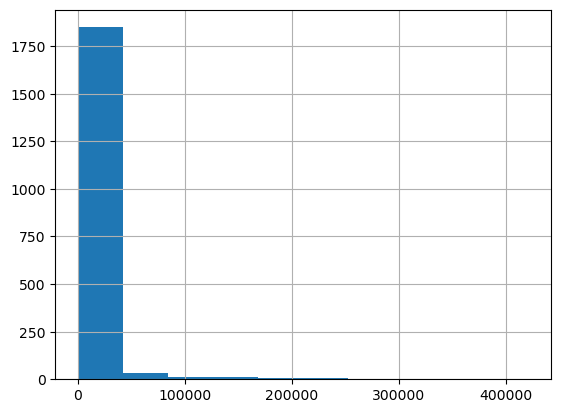

In [68]:
nyc_cbd['S000_area_norm'].hist();

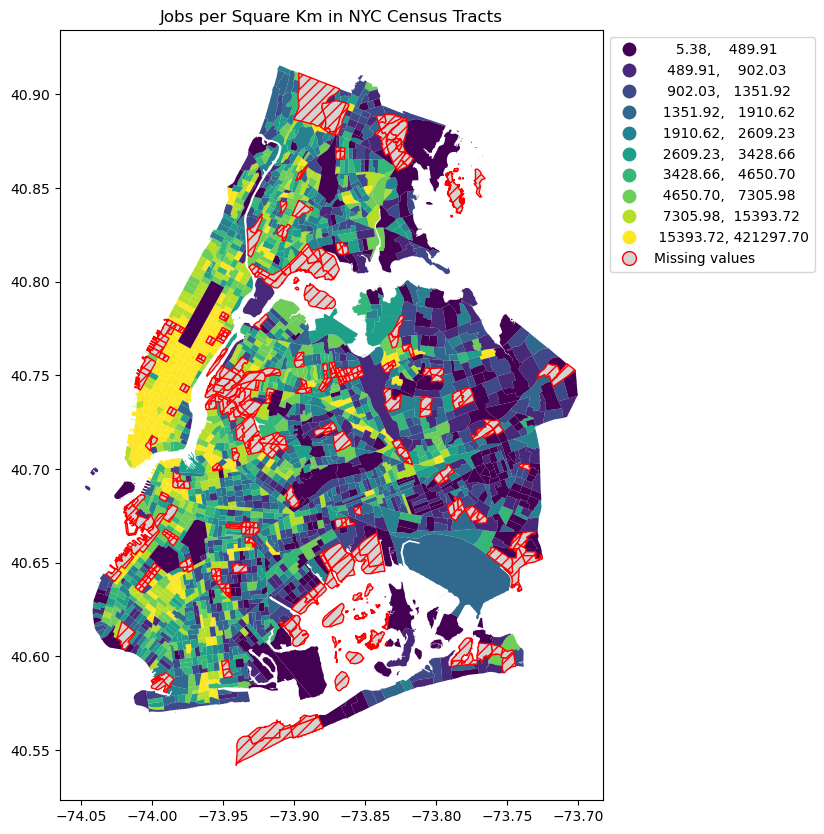

In [73]:
fig, ax = plt.subplots(figsize = (10,10))
nyc_cbd.plot(column = 'S000_area_norm',ax = ax, k=10, scheme='Quantiles', legend=True, 
                     missing_kwds={"color": "lightgrey", ## what to do with missing values
                                         "edgecolor": "red",
                                        "hatch": "///",
                                        "label": "Missing values",}
                     ,legend_kwds={'bbox_to_anchor': (1, 1),'loc': 'upper left'})
plt.title('Jobs per Square Km in NYC Census Tracts')
plt.show()

In [76]:
# find top 10 percent
# Calculate the 90th percentile of the jobs_per_km column
jobs_per_km_threshold = nyc_cbd["S000_area_norm"].quantile(0.99)
print(jobs_per_km_threshold)
# # Create a new DataFrame with only the rows where jobs_per_km is in the top 10%
# top10_nyc_cbd = nyc_cbd[nyc_cbd["jobs_per_km"] >= jobs_per_km_threshold]

173294.27723564353


In [77]:
len(nyc_cbd[nyc_cbd["S000_area_norm"] >= jobs_per_km_threshold])

20

In [78]:
#percent of total jobs
nyc_cbd[nyc_cbd["S000_area_norm"] >= jobs_per_km_threshold]['S000'].sum()/nyc_cbd['S000'].sum()

0.24539868760789707

In [80]:
quant_thresh = pd.DataFrame(columns = ['Quantile', 'Jobs Threshold','Tracts', '% Total Jobs'])
quantiles = [0.75, 0.80, 0.85, 0.90, 0.95, 0.99]

for quantile in quantiles:
    jobs_per_km_threshold = nyc_cbd["S000_area_norm"].quantile(quantile)
    tract_count = len(nyc_cbd[nyc_cbd["S000_area_norm"] >= jobs_per_km_threshold])
    perc_tot = nyc_cbd[nyc_cbd["S000_area_norm"] >= jobs_per_km_threshold]['S000'].sum()/nyc_cbd['S000'].sum()
    
    # Append the results to the quant_thresh DataFrame
    quant_thresh.loc[len(quant_thresh)] = [quantile, jobs_per_km_threshold, tract_count, perc_tot]
quant_thresh

,Quantile,Jobs Threshold,Tracts,% Total Jobs
0,0.75,5768.072973,482.0,0.790781
1,0.80,7305.983605,385.0,0.748030
2,0.85,9637.671045,289.0,0.708073
3,0.90,15393.717438,193.0,0.647600
4,0.95,33122.540328,97.0,0.536291
5,0.99,173294.277236,20.0,0.245399


In [88]:
Top1 = nyc_cbd[nyc_cbd["S000_area_norm"] >= nyc_cbd["S000_area_norm"].quantile(0.99)]

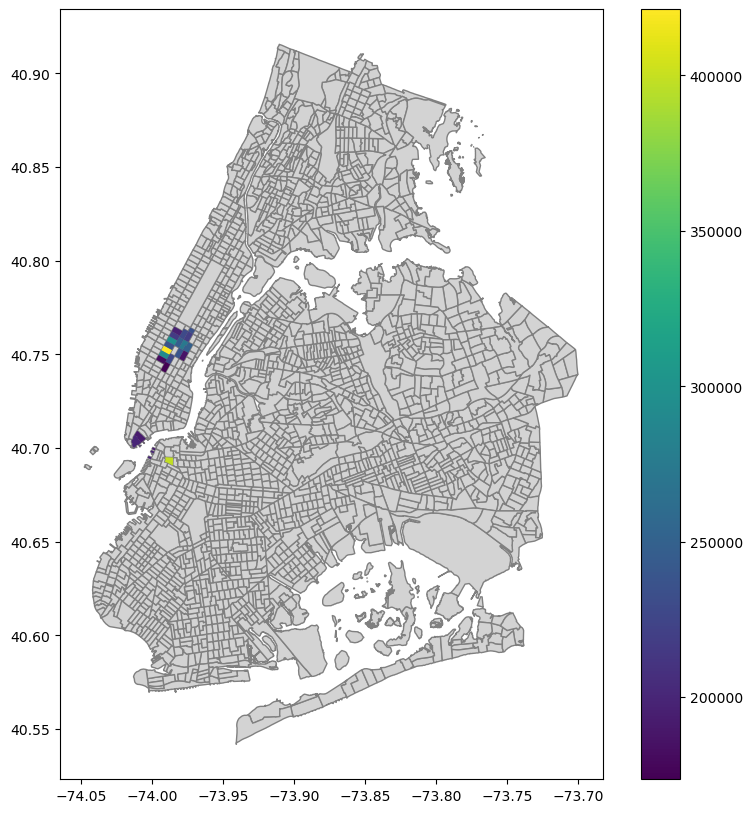

In [89]:
fig,ax = plt.subplots(figsize=(10,10)) #standardize scale!!
tracts_gdf.plot(ax = ax, color = 'lightgrey', edgecolor = 'grey')
Top1.plot(ax = ax, column='S000_area_norm', legend=True)
plt.show()